 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale portfolio Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Check my current directory
print(f"My current path is---> {Path.cwd()}")

My current path is---> C:\Users\Minyeong\desktop\pandas_portfolio


In [3]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv)
whale_df.head(3)

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213

In [4]:
# Setting index into Date column and converting the dates to a DateTimeIndex
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head(3)

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                    
2015-03-02  2015-03-02                        NaN                 NaN   
2015-03-03  2015-03-03                  -0.001266           -0.004981   
2015-03-04  2015-03-04                   0.002230            0.003241   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213

In [5]:
# Drop extra column
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213

In [6]:
# Sort datetime index in ascending order (past to present)
whale_df.sort_index(inplace=True)
whale_df.head(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213

In [7]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_df.dropna(inplace=True)

In [9]:
# Sanity check
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [10]:
# Sanity check
whale_df.head(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head(10)

Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735

In [12]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_df.dropna(inplace=True)

In [14]:
# Sanity check
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [15]:
# Sanity check
algo_df.head(10)

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
2014-06-12 -0.000028 -0.003841
2014-06-13  0.001917 -0.000814
2014-06-16  0.001084  0.001831
2014-06-17  0.000922  0.006870
2014-06-18 -0.006303  0.007228

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")

sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head(3)

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99

In [17]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types. Remove dollar signs from "Close" column and convert the data types as numeric values.
sp500_df["Close"] = sp500_df["Close"].str.replace("$", " ").astype("float")

In [19]:
# Sanity check
sp500_df.dtypes

Close    float64
dtype: object

In [20]:
# Sanity check
sp500_df.head(3)

Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99

In [21]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [22]:
# Count nulls
sp500_df.isnull().sum()

Close    1
dtype: int64

In [23]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [24]:
# Rename Column
sp500_df.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_df.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

In [26]:
# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows for sanity check
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

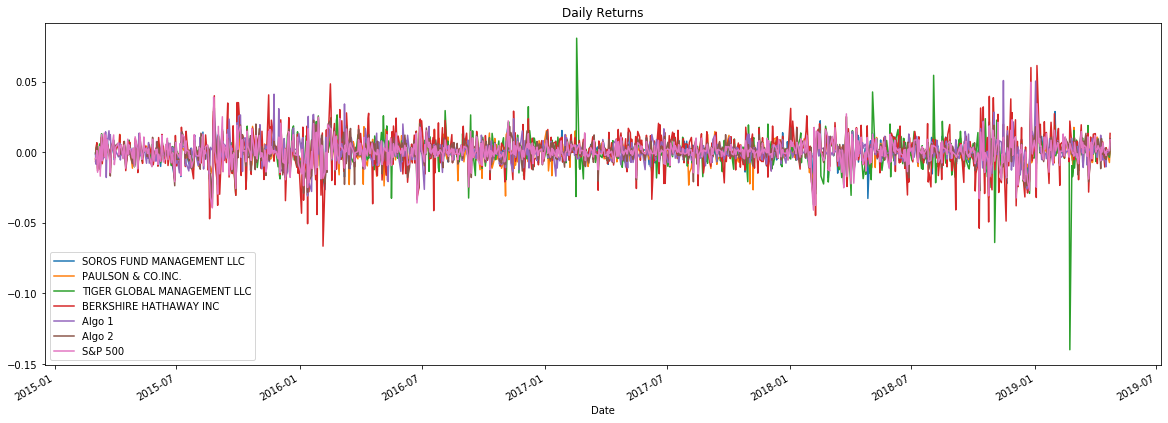

In [27]:
# Plot daily returns
combined_df.plot(title = "Daily Returns", figsize = (20, 7))

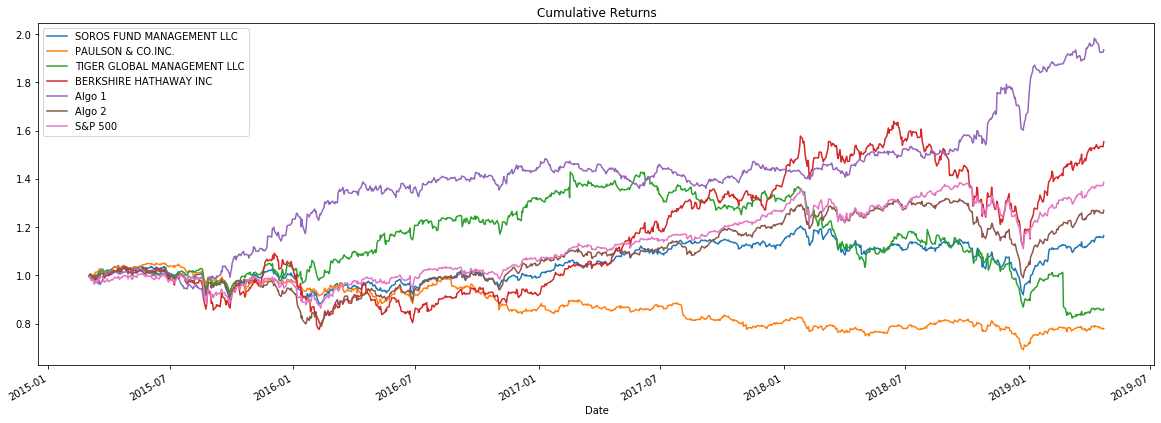

In [28]:
# Plot cumulative returns
cumulative_returns = ( 1 + combined_df ).cumprod() 
cumulative_returns.plot(title = "Cumulative Returns", figsize = (20, 7))

- Qeustion: Does any portfolio outperform the S&P 500?
<br>
<br>
- Answer: Based on the plot above, I think BERKSHIRE HATHAWAY INC. from the Whales portfolio and Algo 1 from Harold's company outperform the S&P 500.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

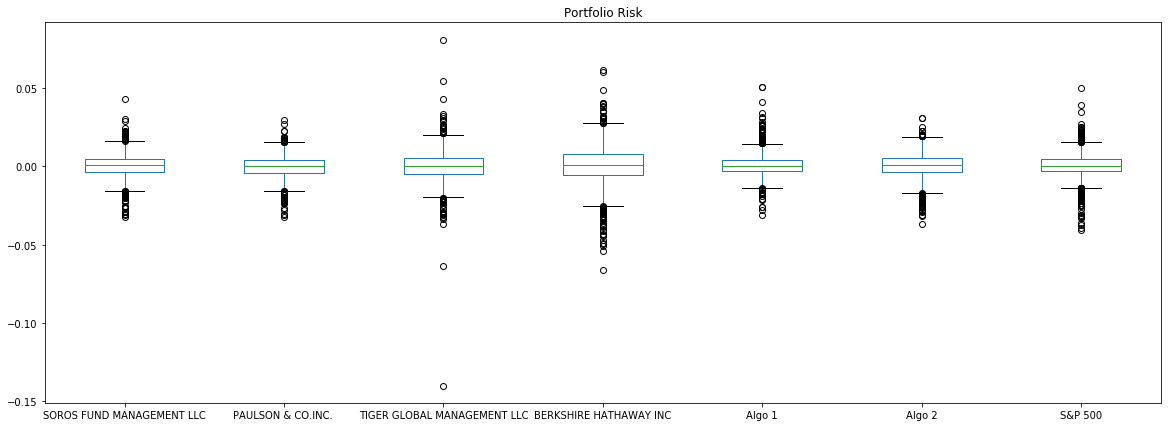

In [29]:
# Box plot to visually show risk
combined_df.plot.box(title = "Portfolio Risk", figsize = (20, 7))

In [30]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [31]:
# Which portfolios are riskier than the S&P 500?
volatility > volatility["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

- Answer: Based on above, PAULSON & CO.INC., Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2 have higher standard deviation than S&P 500's standard deviation, so I conclude that they are riskier than the S&P 500.

In [32]:
# Determine which portfolios are riskier than the S&P 500
volatility > volatility["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = combined_df.std()*np.sqrt(252)
annualized_volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

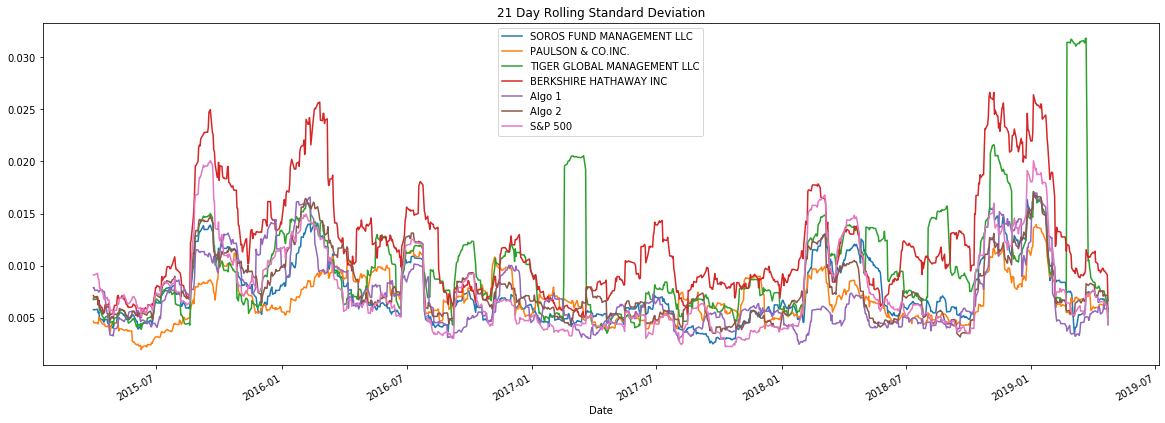

In [34]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_std_21 = combined_df.rolling(window=21).std().plot(title = "21 Day Rolling Standard Deviation", figsize = (20, 7))

In [35]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

In [36]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["S&P 500"])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [37]:
variance = combined_df["S&P 500"].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

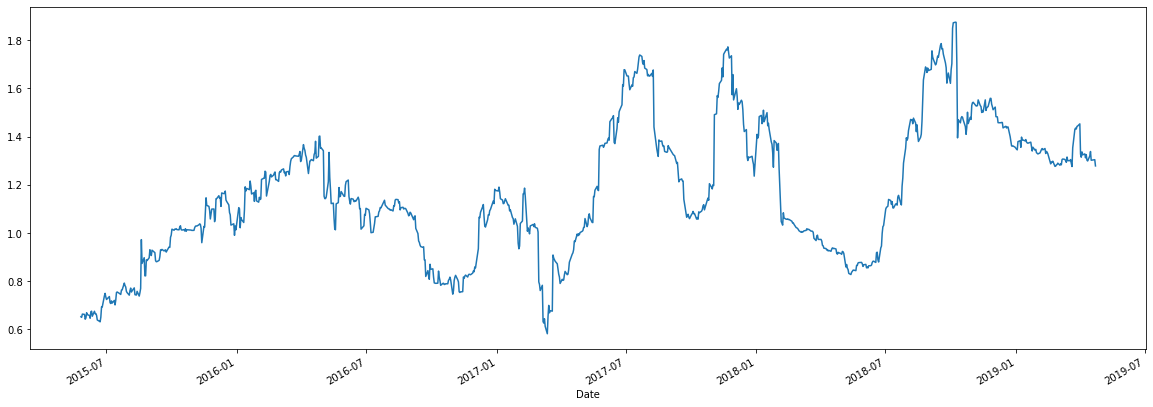

In [38]:
beta = covariance/variance
beta.plot(figsize=(20,7))

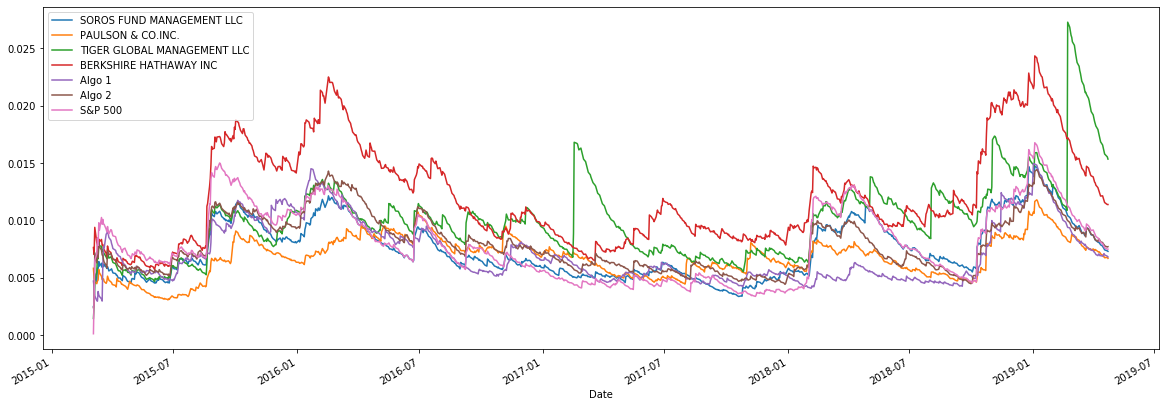

In [39]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

ewm_ = combined_df.ewm(halflife = 21).std()
ewm_.plot(figsize=(20, 7))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [40]:
# Calculate annualized Sharpe Ratios
combined1 = combined_df.mean() * 252
combined1

SOROS FUND MANAGEMENT LLC      0.044672
PAULSON & CO.INC.             -0.053912
TIGER GLOBAL MANAGEMENT LLC   -0.020936
BERKSHIRE HATHAWAY INC         0.127519
Algo 1                         0.166771
Algo 2                         0.066395
S&P 500                        0.088026
dtype: float64

In [41]:
combined2 = combined_df.std() * np.sqrt(252)
combined2


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [42]:
sharpe_ratio = combined1 / combined2
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

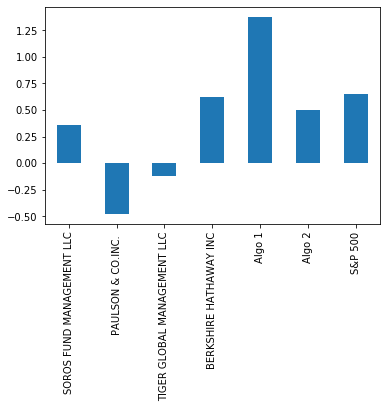

In [43]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Read the first stock

goog_history_csv = Path("goog_historical.csv")

goog_df = pd.read_csv(goog_history_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.sort_index(inplace=True)
goog_df.head(3)

Symbol     NOCP
Trade DATE                
2018-05-11   GOOG  1098.26
2018-05-14   GOOG  1100.20
2018-05-15   GOOG  1079.23

In [45]:
# Read the second stock
aapl_history_csv = Path("aapl_historical.csv")

aapl_df = pd.read_csv(aapl_history_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df.sort_index(inplace=True)
aapl_df.head(3)


Symbol    NOCP
Trade DATE               
2018-05-11   AAPL  188.59
2018-05-14   AAPL  188.15
2018-05-15   AAPL  186.44

In [46]:
# Read the third stock
cost_history_csv = Path("cost_historical.csv")

cost_df = pd.read_csv(cost_history_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.sort_index(inplace=True)
cost_df.head(3)

Symbol    NOCP
Trade DATE               
2018-05-11   COST  195.76
2018-05-14   COST  195.88
2018-05-15   COST  195.48

In [47]:
# Concatenate all stocks into a single DataFrame
my_combined_df = pd.concat([goog_df, aapl_df, cost_df], axis="rows", join="inner")
my_combined_df.head()

Symbol     NOCP
Trade DATE                
2018-05-11   GOOG  1098.26
2018-05-14   GOOG  1100.20
2018-05-15   GOOG  1079.23
2018-05-16   GOOG  1081.77
2018-05-17   GOOG  1078.59

In [48]:
# Reset the index

my_combined_df.reset_index(inplace=True)
my_combined_df


Trade DATE Symbol     NOCP
0   2018-05-11   GOOG  1098.26
1   2018-05-14   GOOG  1100.20
2   2018-05-15   GOOG  1079.23
3   2018-05-16   GOOG  1081.77
4   2018-05-17   GOOG  1078.59
..         ...    ...      ...
745 2019-05-03   COST   244.62
746 2019-05-06   COST   244.23
747 2019-05-07   COST   240.18
748 2019-05-08   COST   241.34
749 2019-05-09   COST   243.47

[750 rows x 3 columns]

In [49]:
# Pivot so that each column of prices represents a unique symbol
pivot_table = my_combined_df.pivot_table(index= "Trade DATE", columns = "Symbol", values = "NOCP")

pivot_table.sort_index(inplace=True)
pivot_table

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]

In [50]:
pivot_table.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [51]:
# Drop Nulls
pivot_table.dropna(inplace=True)

In [52]:
my_pct_change = pivot_table.pct_change()
my_pct_change

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
...              ...       ...       ...
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335

[250 rows x 3 columns]

In [53]:
my_pct_change.dropna(inplace=True)
my_pct_change.head()

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

weighted_returns = my_pct_change.dot(weights)
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [55]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_of_returns = combined_df.copy()
all_of_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

In [56]:
all_of_returns["Custom"] = weighted_returns
all_of_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  Custom  
Date                                    
2015-03-03 -0.000949 -0.004539     NaN  
2015-03-04  0.002416 -0.004389     NaN  
2015-03-05  0.004323  0.001196     NaN  
2015-03-06 -0.011460 -0.014174     NaN  
2015-03-09  0.001303  0.003944     NaN

In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_of_returns.dropna(inplace=True)
all_of_returns.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500    Custom  
Date                                      
2019-04-16  0.002899  0.000509  0.000340  
2019-04-17 -0.005228 -0.002274  0.009292  
2019-04-18 -0.001229  0.001579  0.001545  
2019-04-22 -0.001936  0.001012  0.001217  
2019-04-23  0.009622  0.008841  0.011959

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [58]:
# Risk (annualized standard deviation)
volatility3 = all_of_returns.std() * np.sqrt(252)
volatility3

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

In [59]:
volatility3 > volatility3["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
Custom                          True
dtype: bool

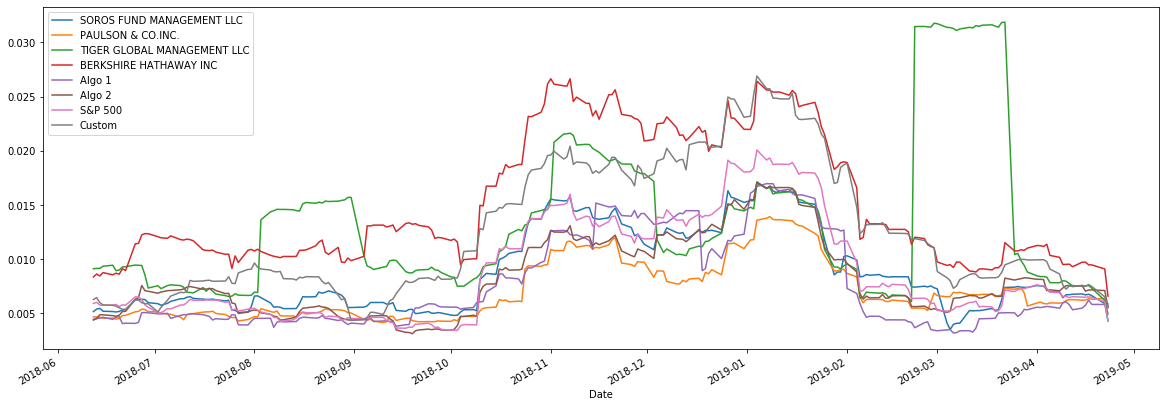

In [60]:
# Rolling (monthly standard deviation)

rolling_std = all_of_returns.rolling(window=21).std()
rolling_std.plot(figsize = (20,7))

In [61]:
# Annualized Sharpe Ratios

combined5 = all_of_returns.mean() * 252
combined6 = all_of_returns.std() * np.sqrt(252)

sharpe_ratio7 = combined5 / combined6
sharpe_ratio7


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

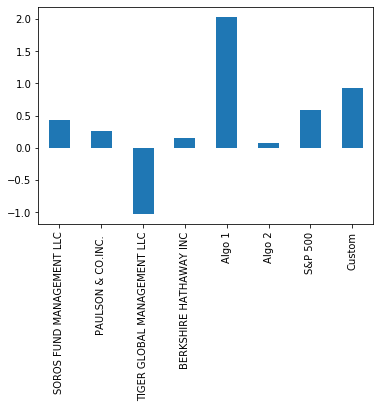

In [62]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio7.plot.bar()

In [63]:
# Create a correlation analysis
correlation7= all_of_returns.corr()
correlation7

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791962   
PAULSON & CO.INC.                             0.791962            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.478627            0.485375   
BERKSHIRE HATHAWAY INC                        0.816675            0.650758   
Algo 1                                        0.337826            0.361301   
Algo 2                                        0.862846            0.783656   
S&P 500                                       0.876981            0.766680   
Custom                                        0.733250            0.644210   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.478627   
PAULSON & CO.INC.                               0.485375   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.325457   
Algo 1                                          0.114554   
Algo 2                                          0.409496   
S&P 500                                         0.481030   
Custom                                          0.391972   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.816675  0.337826  0.862846   
PAULSON & CO.INC.                          0.650758  0.361301  0.783656   
TIGER GLOBAL MANAGEMENT LLC                0.325457  0.114554  0.409496   
BERKSHIRE HATHAWAY INC                     1.000000  0.327000  0.782804   
Algo 1                                     0.327000  1.000000  0.365512   
Algo 2                                     0.782804  0.365512  1.000000   
S&P 500                                    0.852303  0.289358  0.875721   
Custom                                     0.801158  0.261471  0.739936   

                              S&P 500    Custom  
SOROS FUND MANAGEMENT LLC    0.876981  0.733250  
PAULSON & CO.INC.            0.766680  0.644210  
TIGER GLOBAL MANAGEMENT LLC  0.481030  0.391972  
BERKSHIRE HATHAWAY INC       0.852303  0.801158  
Algo 1                       0.289358  0.261471  
Algo 2                       0.875721  0.739936  
S&P 500                      1.000000  0.871875  
Custom                       0.871875  1.000000

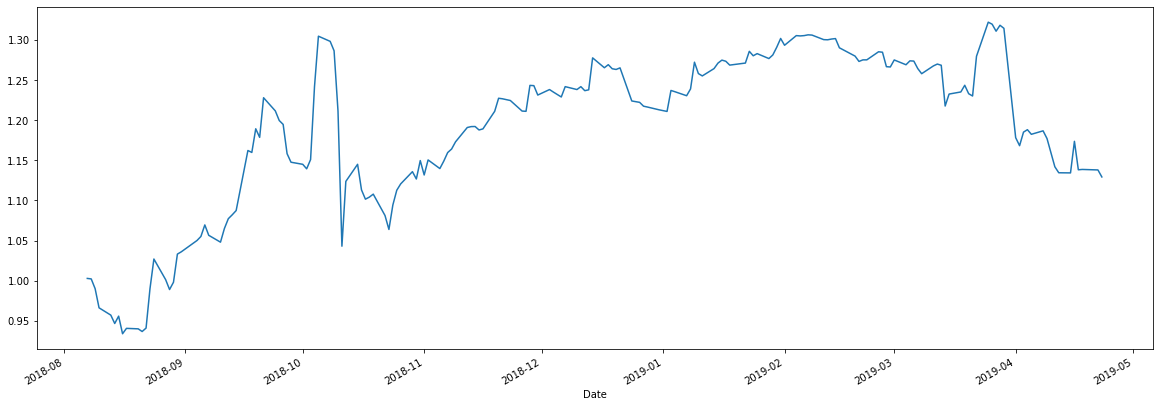

In [64]:
# Beta

covariance7 = all_of_returns["Custom"].rolling(window=60).cov(all_of_returns["S&P 500"])

variance7 = all_of_returns["S&P 500"].rolling(window=60).var()


beta7 = covariance7 / variance7
beta7.plot(figsize = (20,7))